<a href="https://colab.research.google.com/github/davidlealo/aprendiendo_yolo/blob/main/uso_de_opencv_para_tomar_fotos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
from google.colab.patches import cv2_imshow
import base64
from google.colab import output
import IPython
from PIL import Image
import io


In [27]:
from IPython.display import display, Javascript

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            div.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            const response = await fetch(dataUrl);
            const blob = await response.blob();
            const file = new File([blob], 'photo.jpg', {type: 'image/jpeg'});
            return file;
        }
        takePhoto({quality: %f}).then(file => {
            const reader = new FileReader();
            reader.onload = () => {
                google.colab.kernel.invokeFunction('notebook.save_photo', [reader.result], {});
            };
            reader.readAsDataURL(file);
        });
    ''' % quality)
    display(js)

take_photo()


<IPython.core.display.Javascript object>

In [28]:
def save_photo(data):
    binary = base64.b64decode(data.split(',')[1])
    with open('photo.jpg', 'wb') as f:
        f.write(binary)

# Register the function to handle the photo data
output.register_callback('notebook.save_photo', save_photo)


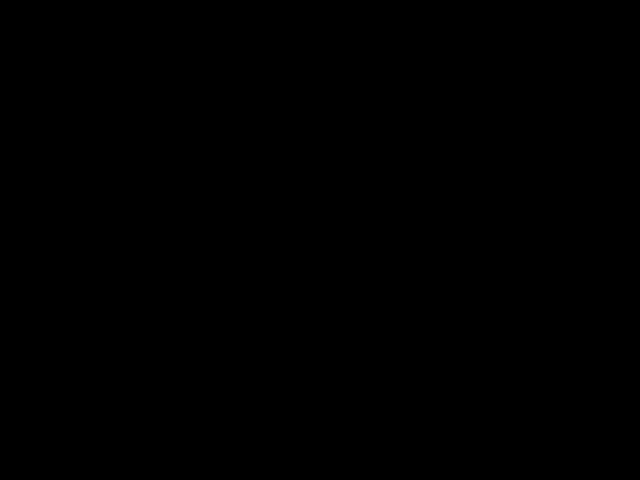

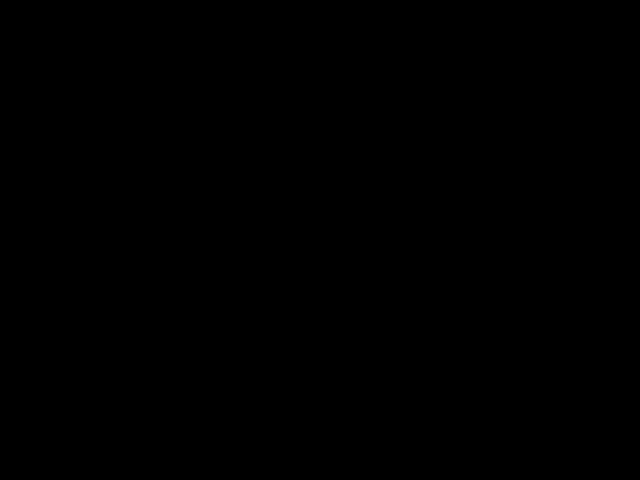

In [29]:
from IPython.display import display, Image

display(Image('photo.jpg'))

img = cv2.imread('photo.jpg')
if img is not None:
    cv2_imshow(img)
else:
    print("No se pudo cargar la imagen.")


In [32]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  39634      0 --:--:-- --:--:-- --:--:-- 39771


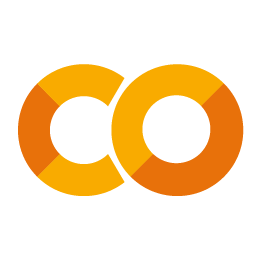

In [34]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [35]:

import cv2 as cv
import sys

# img = cv.imread(cv.samples.findFile("starry_night.jpg"))

img = cv.imread("imagen.jpeg")

if img is None:
    sys.exit("Could not read the image.")

cv.imshow("Display window", img)
k = cv.waitKey(0)

if k == ord("s"):
    cv.imwrite("starry_night.png", img)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [37]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys


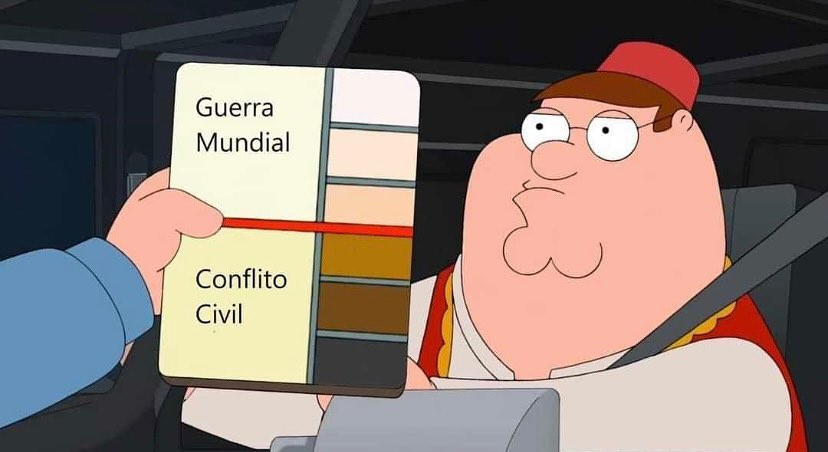

In [38]:
# Intenta leer la imagen
img = cv.imread("imagen.jpeg")

# Verifica si la imagen fue cargada correctamente
if img is None:
    sys.exit("Could not read the image.")

# Muestra la imagen usando cv2_imshow
cv2_imshow(img)

# Espera por una tecla
k = cv.waitKey(0)

# Si se presiona la tecla 's', guarda la imagen
if k == ord("s"):
    cv.imwrite("starry_night.png", img)


In [39]:
from google.colab import files
uploaded = files.upload()


Saving 1779947_10152331593953420_33829733_n.jpeg to 1779947_10152331593953420_33829733_n.jpeg
